# Packages utiles

Comme vu dans l'introduction JULIA possède une bibliothèque de package assez grande dont il n'est pas forcément aisé d'en faire le tri...

Je vous propose ici la description et utilisation de quelques classiques

En premier lieu un packages graphiques :
* **Plots**
* avec des backend **Gr**, **PyPlot**, **Plotly**

et deux packages plus "statistiques" : 

* **DataFrames**
* **Rdatasets**

# Graphiques

La gestion graphique ne fait pas partie intégrante de JULIA il faut faire appel à des packages extérieurs et plusieurs choix sont possibles. En voici quelques uns

## Plots

Plots est basé sur une bibliothèque éprouvée MatPlotLib (en Python). Sa syntaxe est identique à celle de MATLAB 

In [ ]:
(v1.1) pkg> add Plots
(v1.1) pkg> add PlotlyJS
(v1.1) pkg> add PyPlot

In [43]:
using Plots 

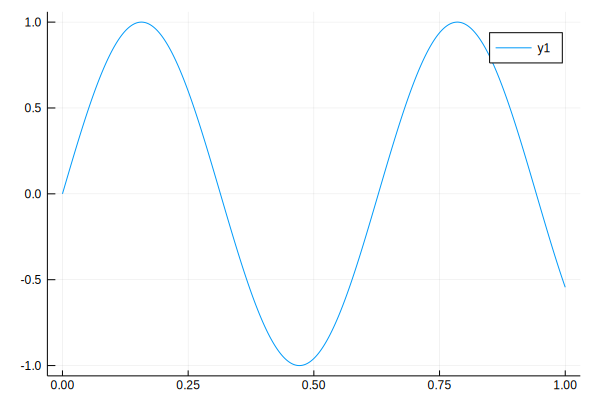

In [44]:
x=range(0,stop=1,length=3000);
plot(x,sin.(10*x))

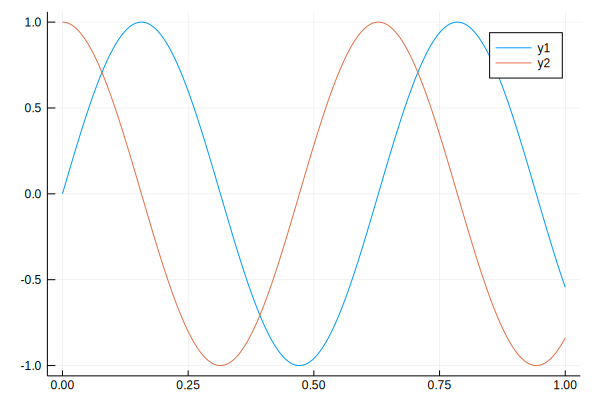

In [49]:
x=range(0,stop=1,length=3000);
plot(x,sin.(10*x))
plot!(x,cos.(10*x))


In [52]:
subplot(2,1,1)
plot(x,sin.(x),"g",linewidth=2.0)
subplot(2,1,2)
plot(x,x,"r")
grid(true)
title("tracé 2")

UndefVarError: UndefVarError: subplot not defined

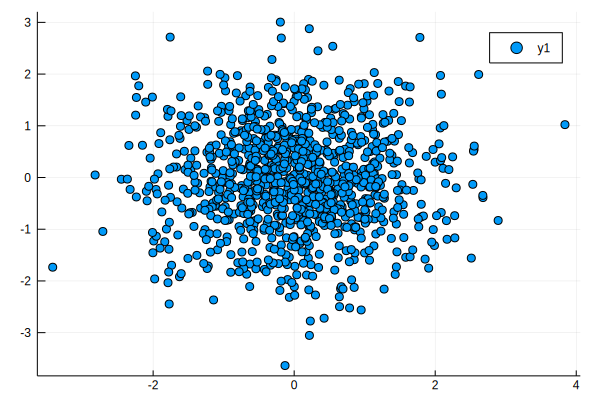

In [51]:
n=1024
X=randn(n)
Y=randn(n)
scatter(X,Y)

In [5]:
X=rand(5)
Y=-rand(5)
bar(1:5,X,facecolor="#9999ff", edgecolor="white")
bar(1:5,Y,facecolor="#ff9999", edgecolor="white")
for i=1:5
    txt=string(X[i])
    text(i+0.1,X[i]+0.01,txt[1:7])
    txt=string(Y[i])
    text(i+0.1,Y[i]-0.08,txt[1:7])
end
ylim(-1.2,1.2)

LoadError: [91mUnknown key: edgecolor[39m

In [6]:
z=rand(20)
pie(z);

In [7]:
contour(rand(50,50))
colorbar()

LoadError: [91mUndefVarError: colorbar not defined[39m

In [8]:
surf(rand(50,50))

LoadError: [91mUndefVarError: surf not defined[39m

In [9]:
X=[x for x=-1:0.2:1, y=-1:0.2:1]
Y=[y for x=-1:0.2:1, y=-1:0.2:1]
quiver(-1:0.2:1,-1:0.2:1,X,Y)

LoadError: [91mCouldn't process recipe args: (StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}, StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}, Array{Float64,2}, Array{Float64,2})[39m

D'autres packages sont disponible Gadfly, Winston, AsciiPlot, GLVisualize...

## Type DataFrames

But : travailler avec des tables de données.
Ce sont des tables dont les colonnes sont des DataArray. Voici deux façons de construire des DataFrames :

In [28]:
using DataFrames

In [29]:
df = DataFrame(A = 1:4, B = ["M", "F", "F", "M"])

,A,B
,Int64,String
1,1,M
2,2,F
3,3,F
4,4,M


In [30]:
df = DataFrame()
df[:A] = 1:8;
df[:B] = ["M", "F", "F", "M", "F", "M", "M", "F"];
df

,A,B
,Int64,String
1,1,M
2,2,F
3,3,F
4,4,M
5,5,F
6,6,M
7,7,M
8,8,F


In [31]:
nrows = size(df, 1) # nombre de ligne
ncols = size(df, 2) # nombre de colonne

2

In [33]:
first(df)#Voir le début du tableau

,A,B
,Int64,String
1,1,M


In [34]:
last(df) #Voir la fin du tableau

,A,B
,Int64,String
8,8,F


In [35]:
df[1:3, :] #Voir les lignes 1,2,3 du tableau

,A,B
,Int64,String
1,1,M
2,2,F
3,3,F


Nous avons l'analogie avec summarize du logiciel R :

In [36]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,A,4.5,1,4.5,8,,,Int64
2,B,,F,,M,2,,String


Pour aller plus loin dans le travail statistique sur les Dataframes il nous faut le package RDatasets qui va fournir nombres exemples et on va y retrouver beaucoup de fonctionnalités communes au logiciel R.

## RDatasets

In [38]:
using RDatasets